Price Paid Data tracks the residential property sales in England and Wales that are lodged with HM Land Registry for registration. The dataset is a reliable source of house price information and consists of more than a million definitive records for the annual year 2018

Objectives:
1. Obtain the trend of sales volume across months
2. Observe the daily sales volume in the month of July 2018
3. Comparing the daily sales volume of different property types in
July
4. Draw comparison among different property types in terms of sales
5. Average house prices for different property types in July
6. Obtain the average house price distribution for different property types

Below is a description of the columns/variables in our Price Paid data
Transaction unique identifier --- A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.

Price ---- Sale price stated on the transfer deed.

Date of Transfer ---- Date when the sale was completed, as stated on the transfer deed.

Postcode ---- This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.

Property Type ---- D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other

Newly built ----- Y = a newly built property, N = an established residential building

Duration Relates to the tenure: F = Freehold, L= Leasehold etc.

Street

Locality

Town/City

District

County

PPD Category Type ---- Indicates the type of Price Paid transaction.

Record Status - monthly file only --- Indicates additions, changes and deletions to the records.(see guide below). A = Addition, C = Change, D = Delete.

We are jumping on the data which we will use for demonstrating the utiltiies of Matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [1]:
# Import numpy & pandas
import numpy as np
import pandas as pd

By using pyplot function, we can makes some change to figure, creating a figure, creating a plotting area in a figure, plots some lines in a plotting area, decorating the plot with labels, etc.


In [2]:
# Import matplotlib
import matplotlib.pyplot as pl

In [3]:
# Define the path where data is kept
path1 = '/content/drive/MyDrive/Python Colab/Speed Dating Data.csv'
path2 = '/content/drive/MyDrive/Python Colab/pp-2018.csv'

In [4]:
df=pd.read_csv(path2, names= ['TID','Price','Sale Date','Postcode',
                                             'Property Type','new Build','Tenure',
                                             'PAON','SAON','Street','Locality',
                                             'Town/City','District','County','PPD Category','Record Status'],
                                              parse_dates=['Sale Date'])

In [5]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,new Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [ ]:
df.shape

(959003, 16)

Next we will filter the data to get all the transaction for a particular year and month ( say July 2018 for example). We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions. And for the sake of simplicity we will also remove transactions for property type "O" (Other) and focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced ("T") houses

In [ ]:
df=df.loc[df['Record Status']=='A']
df=df.loc[df['Property Type']!='O']
df=df[(df['Sale Date'].dt.year==2018)]

In [ ]:
df.shape

(959003, 17)

In [ ]:
from datetime import datetime
import matplotlib.pyplot as pl

**First objective : Obtain the trend of sales volume across months.**

Our first step would be to add the below two lines of code for importing the matplotlib.pyplot and to set the output of the plotting to be displayed inline.

%matplotlib inline sets the backend of matplotlib to the 'inline' backend

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
## Create a variable month to denote the transaction month
df['Month']=df['Sale Date'].apply(lambda x: x.strftime('%Y-%m-%d') [:7])

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,new Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [ ]:
monthly_sales_vol = df['Month'].value_counts()

In [ ]:
df.groupby('Month')['TID'].count().reset_index()

,Month,TID
0,2018-01,65004
1,2018-02,66959
2,2018-03,78070
3,2018-04,67094
4,2018-05,76325
5,2018-06,90178
6,2018-07,83082
7,2018-08,95382
8,2018-09,77836
9,2018-10,86892


In [ ]:
df.groupby('Month')['TID'].count().reset_index().rename(columns={'TID' : 'Monthly Sales'})

,Month,Monthly Sales
0,2018-01,65004
1,2018-02,66959
2,2018-03,78070
3,2018-04,67094
4,2018-05,76325
5,2018-06,90178
6,2018-07,83082
7,2018-08,95382
8,2018-09,77836
9,2018-10,86892


In [ ]:
 type(monthly_sales_vol)

pandas.core.series.Series

In [ ]:
monthly_sales_vol

2018-08    95382
2018-11    92427
2018-06    90178
2018-10    86892
2018-07    83082
2018-12    79754
2018-03    78070
2018-09    77836
2018-05    76325
2018-04    67094
2018-02    66959
2018-01    65004
Name: Month, dtype: int64

In [ ]:
monthly_sales_vol.sort_index()

2018-01    65004
2018-02    66959
2018-03    78070
2018-04    67094
2018-05    76325
2018-06    90178
2018-07    83082
2018-08    95382
2018-09    77836
2018-10    86892
2018-11    92427
2018-12    79754
Name: Month, dtype: int64

By using pyplot function, we can makes some change to figure, creating a figure, creating a plotting area in a figure, plots some lines in a plotting area, decorating the plot with labels, etc.

In [ ]:
pl.rcParams['figure.figsize']=(10,5)

Text(0.5, 0, 'Month')

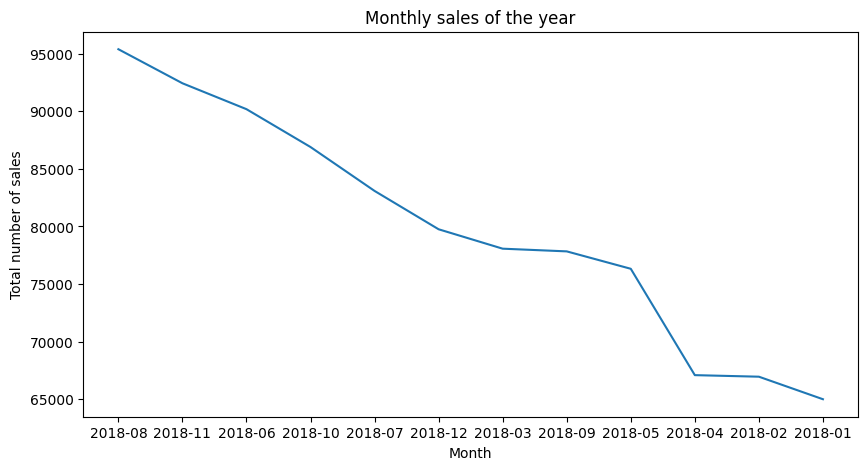

In [ ]:
pl.plot(monthly_sales_vol)
pl.title('Monthly sales of the year')
pl.ylabel('Total number of sales')
pl.xlabel('Month')

**Second objective : Observe the daily sales volume in the month of July 2018**

In [ ]:
# daily sales volume for July 2018
df = df[df['Sale Date'].dt.month == 7]
print(df.shape)

(83082, 17)


In [ ]:
daily_sales_vol = df['Sale Date'].value_counts()
daily_sales_vol

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-07       18
2018-07-01       18
2018-07-22       13
2018-07-08       11
Name: Sale Date, dtype: int64

In [ ]:
daily_sales_vol.sort_index(inplace=True)
daily_sales_vol

2018-07-01       18
2018-07-02     2931
2018-07-03     1828
2018-07-04     2064
2018-07-05     2358
2018-07-06     8400
2018-07-07       18
2018-07-08       11
2018-07-09     2259
2018-07-10     1985
2018-07-11     2165
2018-07-12     3568
2018-07-13     6561
2018-07-14       25
2018-07-15       20
2018-07-16     2883
2018-07-17     1933
2018-07-18     2438
2018-07-19     2571
2018-07-20     8802
2018-07-21       21
2018-07-22       13
2018-07-23     2742
2018-07-24     2116
2018-07-25     2710
2018-07-26     2965
2018-07-27    11145
2018-07-28       31
2018-07-29       25
2018-07-30     3429
2018-07-31     5047
Name: Sale Date, dtype: int64

Text(0, 0.5, 'Total number of sales')

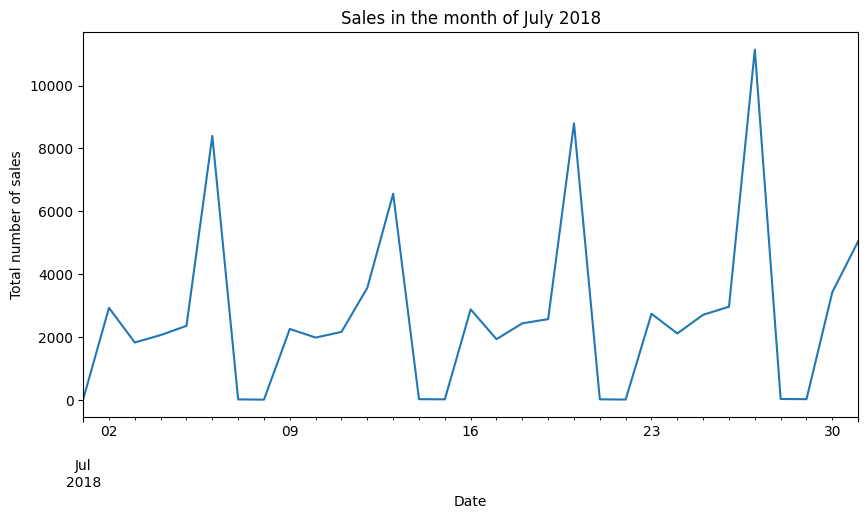

In [ ]:
# create a plot object
daily_sales_vol.plot()
pl.title('Sales in the month of July 2018')
pl.xlabel('Date')
pl.ylabel('Total number of sales')

**Third Objective : Comparing the daily sales volume of different property types in July**


In [ ]:
df.groupby(['Sale Date', 'Property Type'])['TID'].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: TID, Length: 124, dtype: int64

In [ ]:
daily_price = df.groupby(['Sale Date', 'Property Type'])['TID'].count().unstack()
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

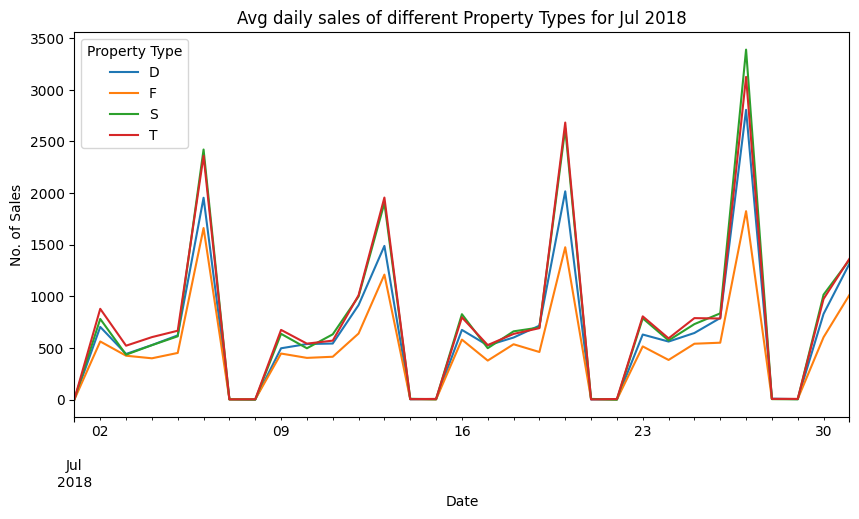

In [ ]:
daily_price.plot()
pl.title('Avg daily sales of different Property Types for Jul 2018')
pl.ylabel('No. of Sales')
pl.xlabel('Date')

**Creating a bar plot:**

A bar chart is really helpful when we want to see for example the total sales volume by different Property types.

To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.

**Fourth Objective : Draw comparison among different property types in terms of sales**


In [ ]:
# Number of residential property transactions in Aug 2018 by property type
sales_type = df['Property Type'].value_counts()

In [ ]:
sales_type

T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

Text(0, 0.5, 'No. of sales')

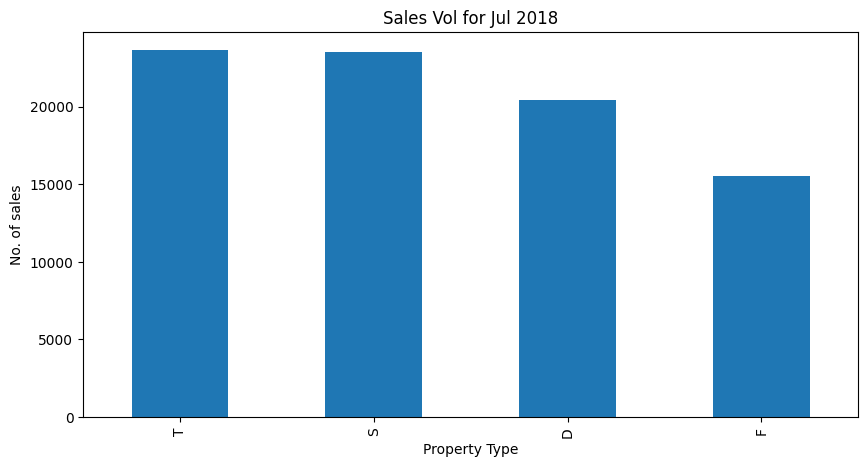

In [ ]:
# Create the plot object
sales_type.plot(kind='bar')
pl.title('Sales Vol for Jul 2018')
pl.xlabel('Property Type')
pl.ylabel('No. of sales')

# Set the display figure size using rcParams method
# plt.rcParams['figure.figsize'] = (10, 5)

**Fifth Objective : Average house prices for different property types in July**

Using an Axes instance from Matplotlib

In [ ]:
Avg_Price_PT = df.groupby(['Property Type'])['Price'].mean()
Avg_Price_PT

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

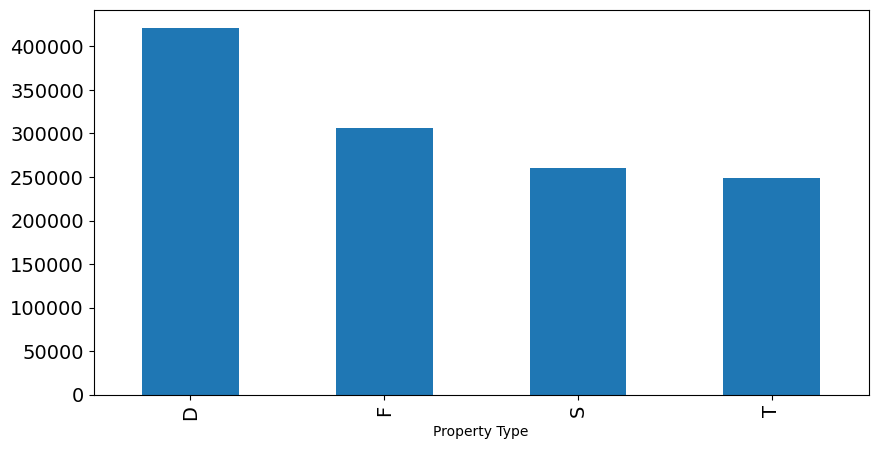

In [ ]:
ax=Avg_Price_PT.plot.bar(figsize=(10,5), fontsize=14)

Text(0, 0.5, 'Average Prices')

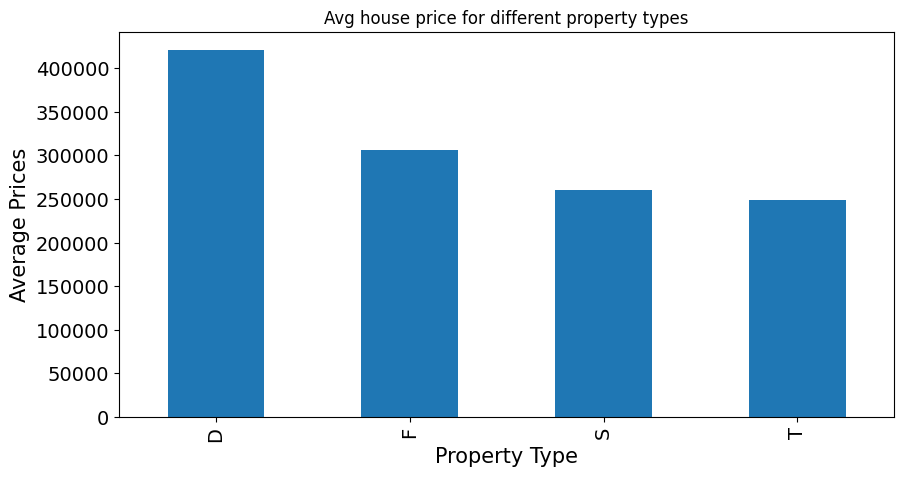

In [ ]:
# Create the figure object
ax = Avg_Price_PT.plot.bar(figsize=(10,5), fontsize=14)

# Set the title
ax.set_title('Avg house price for different property types')

# Set x and y-labels
ax.set_xlabel('Property Type',fontsize=15)
ax.set_ylabel('Average Prices', fontsize=15)

In [ ]:
df.describe()

,Price
count,8.308200e+04
mean,3.051571e+05
std,3.309047e+05
min,1.000000e+00
25%,1.520000e+05
50%,2.350000e+05
75%,3.630000e+05
max,2.121000e+07


**BOX PLOT/Whisker Plot: **

Creating a box and whisker plot, box plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum

**Sixth Objective : Obtain the average house price distribution for different property types**


In [ ]:
df.groupby(['Sale Date','Property Type'])['Price'].mean().unstack

<bound method Series.unstack of Sale Date   Property Type
2018-07-01  D                540000.000000
            F                109000.000000
            S                172571.428571
            T                217400.000000
2018-07-02  D                445515.668085
                                 ...      
2018-07-30  T                257764.741803
2018-07-31  D                460720.867781
            F                314189.130178
            S                277418.688840
            T                282189.347507
Name: Price, Length: 124, dtype: float64>

<Axes: >

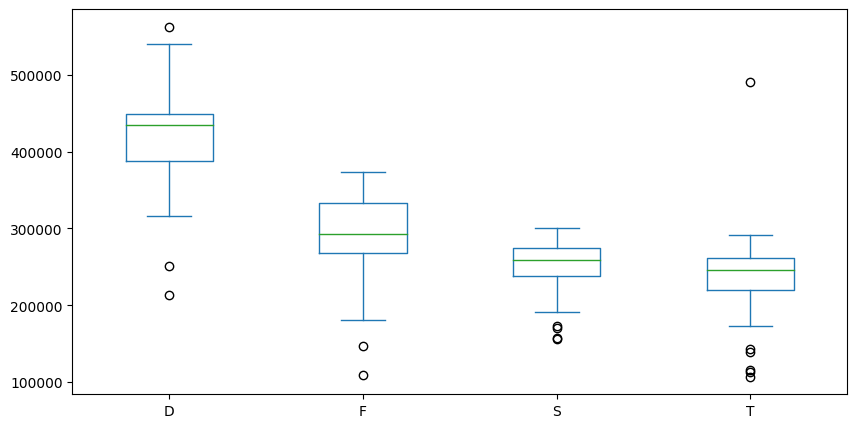

In [ ]:
# Price Distribution on box plot
df.groupby(['Sale Date','Property Type'])['Price'].mean().unstack().plot(kind='box')

**Observation:**
Here, we are considering thee case of property Type D (Dittached):
(We can see that the box is essentially in IQR (Interquartile range))
1. The whiskers which are placed at 1.5 times of IQR (IQR = Q3-Q1)
  Lower whisker: W1 = Q1 - 1.5*IQR
  Upper whisker: W2 = Q3 + 1.5*IQR
2. There is a perticular observation takes very high value, that outlier shows one of the most expensive property for Dittached category.
(Everything outside the whiskers are treated as Outliers)
3. The Median line shows the value for the overall property type category. (Median value is shown by Green Line)
4. The usual data/confirmal data will be shown between the two whiskers.

**Seaborn:** Using Seaborn library for making statistical graphics in Python.



In [6]:
dating_data = pd.read_csv(path1 , encoding = 'unicode_escape')

In [7]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dating_data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

**Histogram:**

Text(0, 0.5, 'Freq')

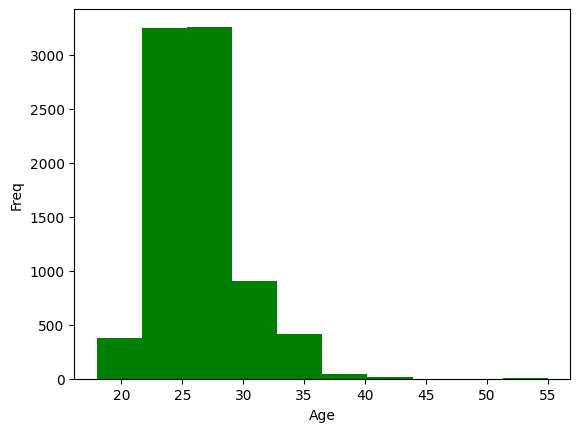

In [8]:
age = dating_data[~dating_data['age'].isna()]['age']
pl.hist(age.values, color='green')
pl.xlabel('Age')
pl.ylabel('Freq')

**Observation:** We can observe that which age group is active (Age range)


In [9]:
#Import Seaborn
import seaborn as sb

<ipython-input-14-9773423db758>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(age, hist=True)


<Axes: xlabel='age', ylabel='Density'>

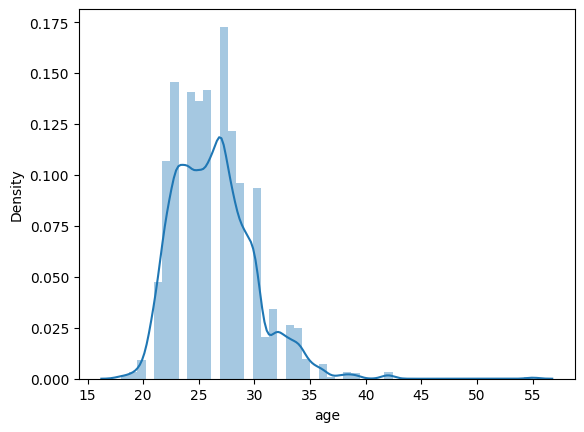

In [ ]:
sb.distplot(age, hist=True)

**Observation:** We can now see the more detailed plot that includes Histogram, that shows most of the people are 20 to 30 age group.

**Correlation Heatmap:**

In [10]:
dating_data_df = dating_data[['gender', 'shopping','gaming','concerts','music']]

In [11]:
corr_df = dating_data_df.corr()
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


<Axes: >

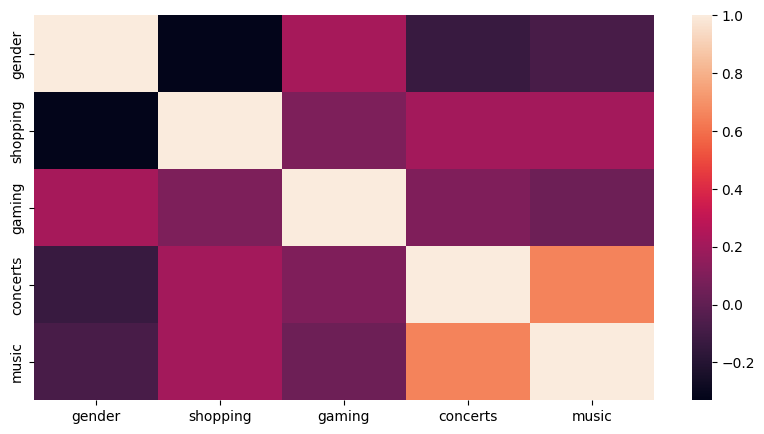

In [ ]:
pl.figure(figsize=(10,5))
sb.heatmap(corr_df)

**Observation:**
Here we can compare the Hearmap with the data table appears above
Gender takes binary values(0,1) 0 shows for Female & 1 shows for Male.
1. We can see, gender is negatively correlated with shopping (-0.330), people with Gender value 0 that shows Female, have higher tendency as compare to Male.
2. Gender value 1 have higher tendency in gaming (0.219) & negaive correlation for concert (-0.128), shows less tendency to attend concerts.
3. For music, Gender value 0 has higher tendency as it shows negative correlation with Gender value 1 (-0.076)

<Axes: >

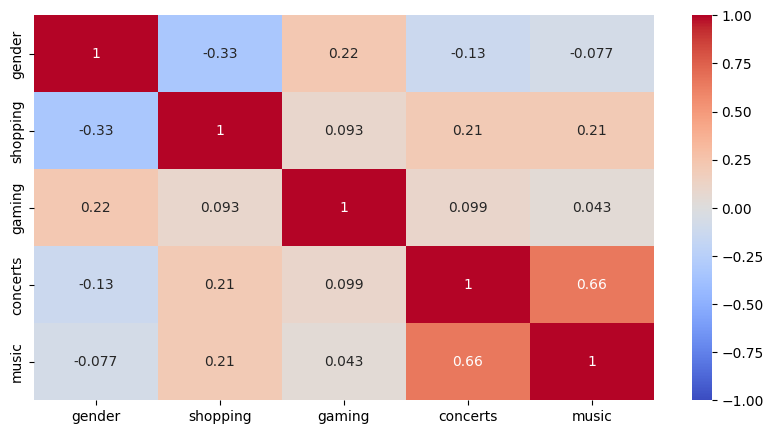

In [ ]:
pl.figure(figsize=(10,5))
sb.heatmap(dating_data_df.corr(), vmin=-1, cmap='coolwarm',annot=True)

# Two way plots


In [ ]:
dating_data_df.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


In [ ]:
dating_data_df.shape

(8378, 5)

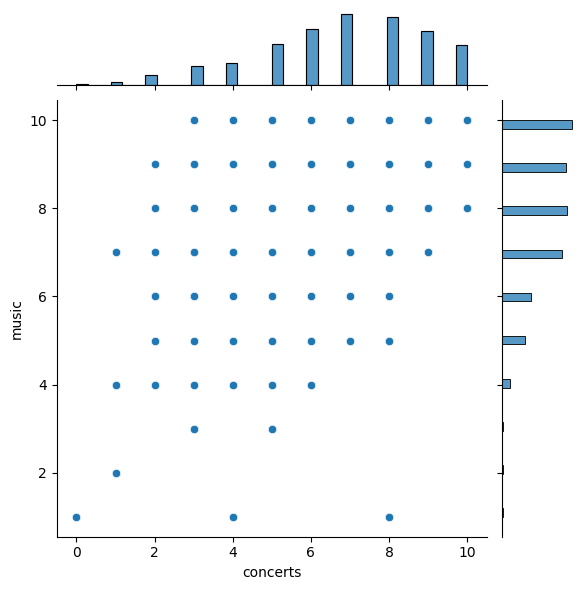

In [ ]:
sb.jointplot(x='concerts',y='music',data=dating_data_df)

**Observation:**
Two way plot helps to create the scatter plot by default with two histograms at the top and right margins of the graph
1. Here, we have around 8000 observation, and the corresponding values of Music & Concerts (takes descrete values)
2. Take a point of Music & Concerts for observation (7,9)

In [12]:
#for example Music,Concerts = 8,6
dating_data_df[(dating_data_df['concerts']==6) & (dating_data_df['music']==8)]

,gender,shopping,gaming,concerts,music
130,1,6.0,8.0,6.0,8.0
131,1,6.0,8.0,6.0,8.0
132,1,6.0,8.0,6.0,8.0
133,1,6.0,8.0,6.0,8.0
134,1,6.0,8.0,6.0,8.0
...,...,...,...,...,...
7801,0,4.0,5.0,6.0,8.0
7802,0,4.0,5.0,6.0,8.0
7803,0,4.0,5.0,6.0,8.0
7804,0,4.0,5.0,6.0,8.0


**Final Observation:**


By using pyplot function, we Made some change to figure, creating a figure, creating a plotting area in a figure, plots some lines in a plotting area, decorating the plot with labels, etc.

**Created a bar plot:**

A bar chart is really helpful when we want to see for example the total sales volume by different Property types.

To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.


**BOX PLOT/Whisker Plot:**
Creating a box and whisker plot, box plot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum



Here, we are considering thee case of property Type D (Dittached):
(We can see that the box is essentially in IQR (Interquartile range))
1. The whiskers which are placed at 1.5 times of IQR (IQR = Q3-Q1)
  Lower whisker: W1 = Q1 - 1.5*IQR
  Upper whisker: W2 = Q3 + 1.5*IQR
2. There is a perticular observation takes very high value, that outlier shows one of the most expensive property for Dittached category.
(Everything outside the whiskers are treated as Outliers)
3. The Median line shows the value for the overall property type category. (Median value is shown by Green Line)
4. The usual data/confirmal data will be shown between the two whiskers.


**Histogram:**
We can now see the more detailed plot that includes Histogram, that shows most of the people are 20 to 30 age group.

**Two way plot**
Two way plot helps to create the scatter plot by default with two histograms at the top and right margins of the graph
1. Here, we have around 8000 observation, and the corresponding values of Music & Concerts (takes descrete values)
2. Take a point of Music & Concerts for observation (7,9)

**Heatmap:**
Here we can compare the Hearmap with the data table appears above
Gender takes binary values(0,1) 0 shows for Female & 1 shows for Male.
1. We can see, gender is negatively correlated with shopping (-0.330), people with Gender value 0 that shows Female, have higher tendency as compare to Male.
2. Gender value 1 have higher tendency in gaming (0.219) & negaive correlation for concert (-0.128), shows less tendency to attend concerts.
3. For music, Gender value 0 has higher tendency as it shows negative correlation with Gender value 1 (-0.076)
